# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_alfred.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Initializing lists to store data
lats_lngs = []
cities = []

# Random set of lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lats_lngs = zip(lats, lngs)

# Find nearest city of each lat-lng
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Add to city list
    if city not in cities:
        cities.append(city)
        
# Print the count to confirm 500+
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=b0086b64955068cc73f537c1c560a8cb&units=metric&q='

In [4]:
# Initializing lists to store data
lat = []
long = []
temps = []
winds = []
pressures = []
humids = []
countries = []
dates = []
clouds = []

# Logger start
print("City List")
print("-")

# requst information for each city
for city in cities:
    response = requests.get(query_url + city)
    
    if response.status_code == 200:    
        data = response.json()
        
        try:
            # extract before appending to ensure no double append
            latitude = data['coord']['lat']
            longitude = data['coord']['lon']
            temp = data['main']['temp']
            pressure = data['main']['pressure']
            humidity = data['main']['humidity']
            wind = data['wind']['speed']
            country = data["sys"]["country"]
            date = data["dt"]
            cloud = data['clouds']['all']
            
            # append to lists
            lat.append(latitude)
            long.append(longitude)
            temps.append(temp)
            pressures.append(pressure)
            humids.append(humidity)
            winds.append(wind)
            countries.append(country)
            dates.append(date)
            clouds.append(cloud)
            
        except: # when all data points are not extracted
            lat.append(print("Data not available"))
            long.append(np.nan)
            temps.append(np.nan)
            winds.append(np.nan)
            pressures.append(np.nan)
            humids.append(np.nan)
            countries.append("")
            dates.append(np.nan)
            clouds.append(np.nan)
            print("Data not available")
    else:
        lat.append(np.nan)
        long.append(np.nan)
        temps.append(np.nan)
        winds.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
        countries.append("")
        dates.append(np.nan)
        clouds.append(np.nan)
    
    print(city)
    time.sleep(1)
    
# Logger finish 
print("-")
print("Cities Finished")

City List
-
torbay
ternate
tumannyy
new norfolk
hilo
vincennes
georgetown
aquiraz
port elizabeth
hobart
rio rancho
berlevag
chuy
faanui
coquimbo
lebu
albany
nikolskoye
dikson
piacabucu
tateyama
taolanaro
palmer
muros
souillac
bluff
arraial do cabo
tuktoyaktuk
barrow
vardo
kaitangata
rikitea
sainte-anne-des-monts
ushuaia
norman wells
port hedland
aklavik
mataura
segovia
ribeira grande
bondowoso
pimentel
saskylakh
rawson
uppsala
constitucion
awbari
kupang
thompson
kondinskoye
kapaa
rapid valley
clyde river
almaznyy
hovd
chokurdakh
lavrentiya
bosobolo
san martin
attawapiskat
manzhouli
tasiilaq
busselton
puerto carreno
lata
mahebourg
barentsburg
bethel
provideniya
ahipara
boa esperanca
punta arenas
mazagao
mendi
zhuanghe
puerto ayora
kavieng
dingle
leningradskiy
port hawkesbury
talnakh
gigmoto
vaini
port alfred
atuona
hermanus
santa rosa
shingu
vao
japura
cape town
butaritari
yellowknife
bredasdorp
isangel
sitka
carnarvon
kishapu
yar-sale
mys shmidta
olinda
carutapera
samusu
sobolevo
harli

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Build dataframe
weather_data = pd.DataFrame()

weather_data["City"] = cities
weather_data["Country"] = countries
weather_data["Latitude"] = lat
weather_data["Longitude"] = long
weather_data["Temperature"] = temps
weather_data["Wind"] = winds
weather_data["Pressure"] = pressures
weather_data["Humidity"] = humids
weather_data['Cloudiness'] = clouds
weather_data["Date"] = dates

# Drop rows with null values
weather_data = weather_data.dropna()

# Display dataframe
weather_data.head()

,City,Country,Latitude,Longitude,Temperature,Wind,Pressure,Humidity,Cloudiness,Date
0,torbay,CA,47.6666,-52.7314,13.46,6.69,997.0,96.0,90.0,1.636902e+09
1,ternate,ID,0.8000,127.4000,27.20,2.37,1009.0,78.0,100.0,1.636902e+09
3,new norfolk,AU,-42.7826,147.0587,3.24,0.45,989.0,75.0,99.0,1.636902e+09
4,hilo,US,19.7297,-155.0900,22.58,1.54,1013.0,92.0,90.0,1.636902e+09
5,vincennes,FR,48.8500,2.4333,12.12,2.24,1020.0,82.0,90.0,1.636902e+09


In [6]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 608
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         554 non-null    object 
 1   Country      554 non-null    object 
 2   Latitude     554 non-null    float64
 3   Longitude    554 non-null    float64
 4   Temperature  554 non-null    float64
 5   Wind         554 non-null    float64
 6   Pressure     554 non-null    float64
 7   Humidity     554 non-null    float64
 8   Cloudiness   554 non-null    float64
 9   Date         554 non-null    float64
dtypes: float64(8), object(2)
memory usage: 47.6+ KB


In [7]:
# Export to CSV
weather_data.to_csv(output_data_file,index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data.Humidity >100]

,City,Country,Latitude,Longitude,Temperature,Wind,Pressure,Humidity,Cloudiness,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

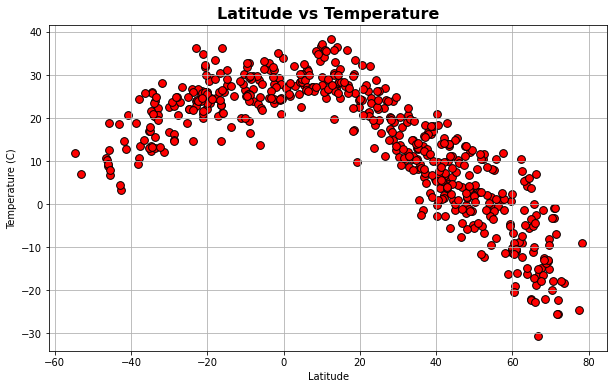

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude, weather_data.Temperature, color="red", edgecolor="black", s=60)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid(True)
plt.savefig("../output_data/lat_temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

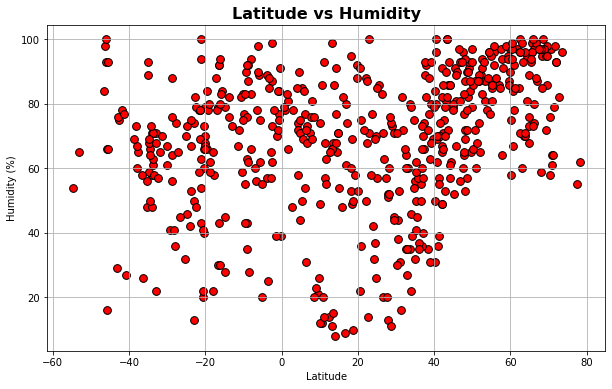

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude, weather_data.Humidity, color="red", edgecolor="black", s=60)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../output_data/lat_humidity_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

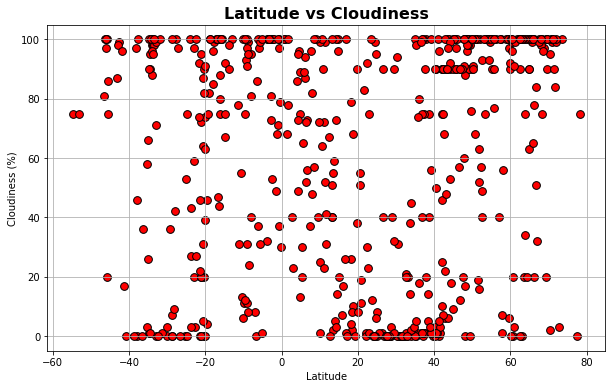

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude, weather_data.Cloudiness, color="red", edgecolor="black", s=60)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../output_data/lat_cloudiness_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

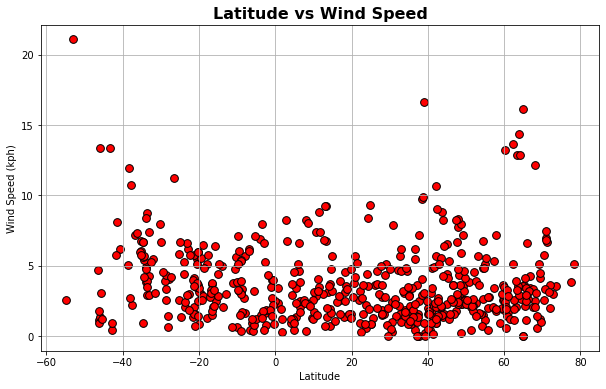

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude, weather_data.Wind, color="red", edgecolor="black", s=60)
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid(True)
plt.savefig("../output_data/lat_windspeed_plot.png")
plt.show()

## Linear Regression

In [31]:
df_n_hem = weather_data.loc[weather_data.Latitude >= 0].reset_index()
df_s_hem = weather_data.loc[weather_data.Latitude < 0].reset_index()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8150561234515518


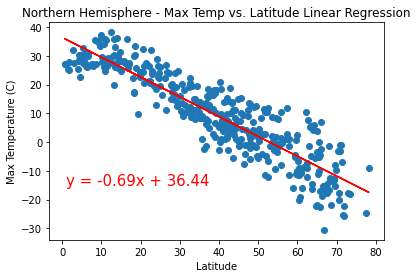

In [45]:
x_values = df_n_hem['Latitude']
y_values = df_n_hem['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/NH_lat_temp_reg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46123850623417456


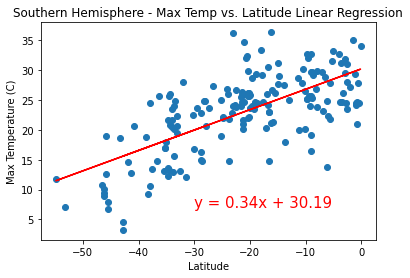

In [50]:
x_values = df_s_hem['Latitude']
y_values = df_s_hem['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/SH_lat_temp_reg.png")
plt.show()

For the northern hemisphere, there is a strong positive correlation between latitude and max temperature based on r value. For the southern hemisphere, there is a positive correlation between latitude and max temperature based on r value.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2060126722999461


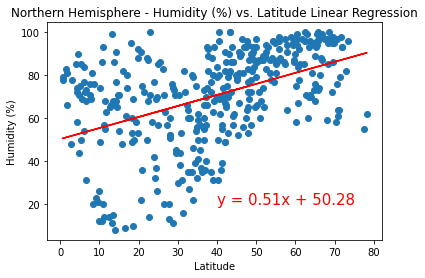

In [58]:
x_values = df_n_hem['Latitude']
y_values = df_n_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/NH_lat_humidity_reg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01139709176356814


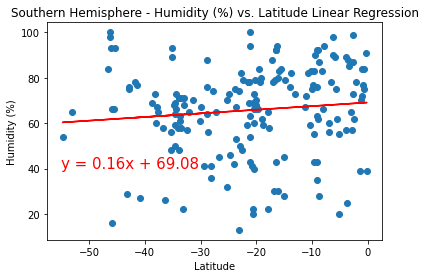

In [65]:
x_values = df_s_hem['Latitude']
y_values = df_s_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/SH_lat_humidity_reg.png")
plt.show()

For the northern hemisphere, there is a weak correlation between latitude and humidity based on r value. For the southern hemisphere, there is no real correlation between latitude and humidity based on r value.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07783854113660349


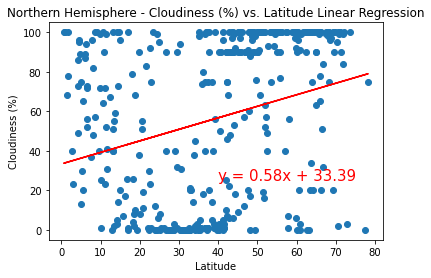

In [69]:
x_values = df_n_hem['Latitude']
y_values = df_n_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/NH_lat_cloud_reg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005919489398437664


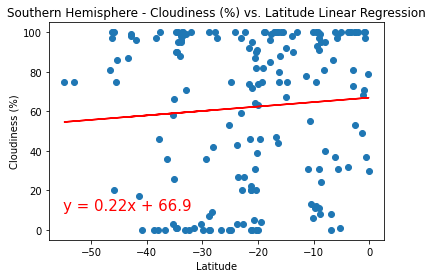

In [73]:
x_values = df_s_hem['Latitude']
y_values = df_s_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/SH_lat_cloud_reg.png")
plt.show()

For the both hemispheres, there is no real correlation between latitude and cloudiness based on r value.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009025069643991517


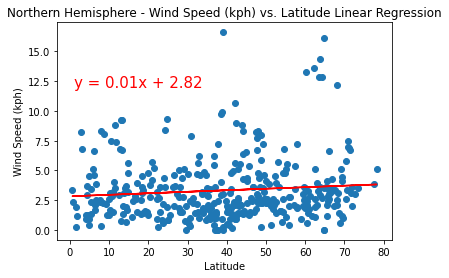

In [79]:
x_values = df_n_hem['Latitude']
y_values = df_n_hem['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title("Northern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/NH_lat_windspd_reg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11273700044772236


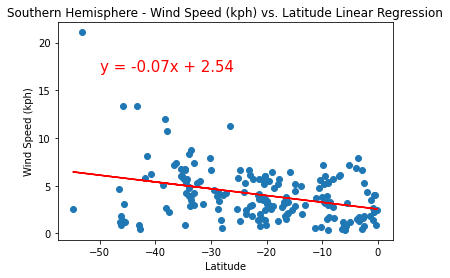

In [81]:
x_values = df_s_hem['Latitude']
y_values = df_s_hem['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title("Southern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/SH_lat_windspd_reg.png")
plt.show()

For the both hemispheres, there is no real correlation between latitude and wind speed based on r value.